In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1.Display the data of white wine and red wine

In [2]:
white = pd.read_csv('winequality-white.csv')
red = pd.read_csv('winequality-red.csv')


In [3]:
white = white.rename(columns={'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid',
                        'residual sugar': 'residual_sugar', 'chlorides': 'chlorides', 'free sulfur dioxide': 'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide',
                        'density': 'density', 'pH': 'pH', 'sulphates': 'sulphates', 'alcohol': 'alcohol', 'quality': 'quality'})

red = red.rename(columns={'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid',
                        'residual sugar': 'residual_sugar', 'chlorides': 'chlorides', 'free sulfur dioxide': 'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide',
                        'density': 'density', 'pH': 'pH', 'sulphates': 'sulphates', 'alcohol': 'alcohol', 'quality': 'quality'})

In [4]:
# Create a copy of dataset

white_copy = white.copy()
red_copy = red.copy()

In [5]:
white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 2.Get the size of both white wine and red wine.


In [7]:
print('Size of wine quality - White :',white.shape)
print('Size of wine quality - Red :',red.shape)

Size of wine quality - White : (4898, 12)
Size of wine quality - Red : (1599, 12)


# 3.Get the number of null in both type of wines



In [8]:
white.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
white.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
red.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
red.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# 4.Check for duplicates and remove them in both type of wine data



In [12]:
dup_white = white[white.duplicated()]
dup_red = red[red.duplicated()]

In [13]:
print('Number of duplicates in White : ',dup_white.shape)
print('Number of duplicates in Red : ',dup_red.shape)

Number of duplicates in White :  (937, 12)
Number of duplicates in Red :  (240, 12)


# 5.Get the number of uniques values in all Feature and print them


In [14]:
for column in white.columns: 
    print('Number of unique values in White wine quality - ', column, ":", white[column].nunique())

Number of unique values in White wine quality -  fixed_acidity : 68
Number of unique values in White wine quality -  volatile_acidity : 125
Number of unique values in White wine quality -  citric_acid : 87
Number of unique values in White wine quality -  residual_sugar : 310
Number of unique values in White wine quality -  chlorides : 160
Number of unique values in White wine quality -  free_sulfur_dioxide : 132
Number of unique values in White wine quality -  total_sulfur_dioxide : 251
Number of unique values in White wine quality -  density : 890
Number of unique values in White wine quality -  pH : 103
Number of unique values in White wine quality -  sulphates : 79
Number of unique values in White wine quality -  alcohol : 103
Number of unique values in White wine quality -  quality : 7


In [15]:
for column in white.columns: 
    print('Number of unique values in Red wine quality - ', column, ":", red[column].nunique())

Number of unique values in Red wine quality -  fixed_acidity : 96
Number of unique values in Red wine quality -  volatile_acidity : 143
Number of unique values in Red wine quality -  citric_acid : 80
Number of unique values in Red wine quality -  residual_sugar : 91
Number of unique values in Red wine quality -  chlorides : 153
Number of unique values in Red wine quality -  free_sulfur_dioxide : 60
Number of unique values in Red wine quality -  total_sulfur_dioxide : 144
Number of unique values in Red wine quality -  density : 436
Number of unique values in Red wine quality -  pH : 89
Number of unique values in Red wine quality -  sulphates : 96
Number of unique values in Red wine quality -  alcohol : 65
Number of unique values in Red wine quality -  quality : 6


# 6.Print the mean density of both the sets



In [16]:
print('Mean Density in White', white['density'].mean())
print('Mean Density in Red', red['density'].mean())

Mean Density in White 0.9940273764801896
Mean Density in Red 0.9967466791744831


# 7.Combine both the datasets with color of the wine in column



In [17]:
white['color'] = 'white'
red['color'] = 'red'

result = pd.concat([white, red], ignore_index=True)

In [18]:
# Create a copy of combined dataset

result_data = result.copy()

In [19]:
result.shape

(6497, 13)

In [20]:
result.head(-1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,red
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red


# 8.Remove the null values if any


There is no null values in both the datasets. 
If there is any null values, then execute the below code. Remove "#" from the code

In [21]:
# null values in combined dataset

result.isnull().sum()

# result = result.dropna()
# print(result)

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [22]:
# null values in separate datasets

# white = white.dropna()
# red = red.dropna()

# print(white)
# print(red)

# 9.Remove the outliers if any

I can see some outliers using the below code

In [23]:
round(result.describe(percentiles = [0.25, 0.75]), 2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00
mean,7.22,0.34,0.32,5.44,0.06,30.53,115.74,0.99,3.22,0.53,10.49,5.82
std,1.30,0.16,0.15,4.76,0.04,17.75,56.52,0.00,0.16,0.15,1.19,0.87
min,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,3.00
25%,6.40,0.23,0.25,1.80,0.04,17.00,77.00,0.99,3.11,0.43,9.50,5.00
50%,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30,6.00
75%,7.70,0.40,0.39,8.10,0.06,41.00,156.00,1.00,3.32,0.60,11.30,6.00
max,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,9.00


In [24]:
Q1 = result.quantile(0.25)
Q3 = result.quantile(0.75)

IQR = Q3 - Q1

removed_outliers_result = result[~((result < (Q1 - 1.5 * IQR)) |(result > (Q3 + 1.5 * IQR))).any(axis=1)]


In [25]:
removed_outliers_result.head(-1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
5,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,red
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red


# 10.Do wines with higher alcohol content receive better ratings?


In [26]:
result['alcohol'].median()

10.3

In [27]:
low_alcohol = result.query('alcohol < 10.3')
high_alcohol = result.query('alcohol >= 10.3')

In [28]:
low_alcohol.shape

(3177, 13)

In [29]:
high_alcohol.shape

(3320, 13)

In [30]:
num_samples = result.shape[0]

In [31]:
num_samples

# By addinng the above row values you will get 6497

6497

In [32]:
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count()

True

Text(0, 0.5, 'Average Quality Rating')

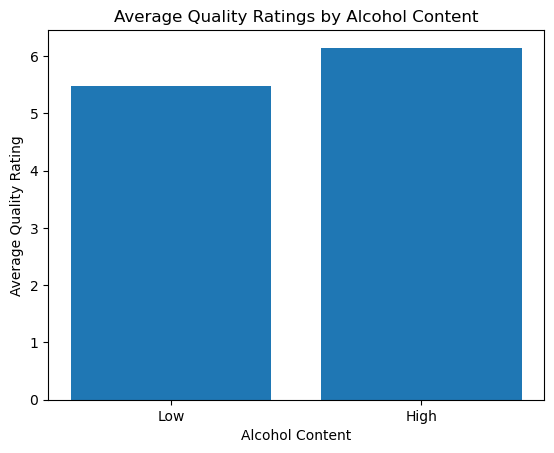

In [33]:
a_median = result['alcohol'].median()

a_low = result.query('alcohol < {}'.format(a_median))
a_high = result.query('alcohol >= {}'.format(a_median))

mean_qual_low = a_low['quality'].mean()
mean_qual_high = a_high['quality'].mean()

rangeis = [1, 2]
heights = [mean_qual_low, mean_qual_high]
labels = ['Low', 'High']
plt.bar(rangeis, heights, tick_label=labels)

plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating')

### From the above bat-plot there is slight difference in Low & High alcohol content. So the rating won't depend on the content of alcohol.

# 11.Find correlation between citric acid content and PH.

In [34]:
correlation = result['citric_acid'].corr(result['pH'])
print('Correlation between citric acid content and pH : ', correlation)
plt.show()

Correlation between citric acid content and pH :  -0.3298081911317221


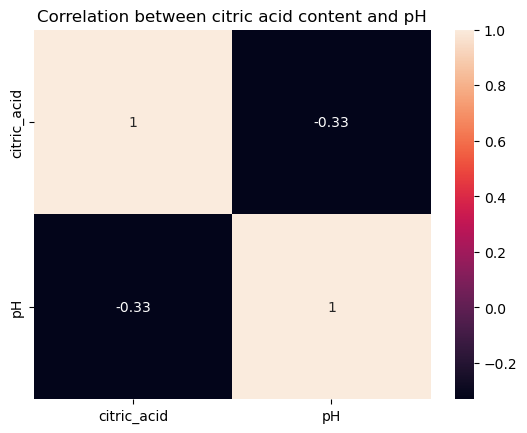

In [35]:
corr_matrix = result[['citric_acid', 'pH']].corr()

# Plot the correlation matrix using seaborn's heatmap
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation between citric acid content and pH')
plt.show()

# 12.Find regression of PH on citric acid

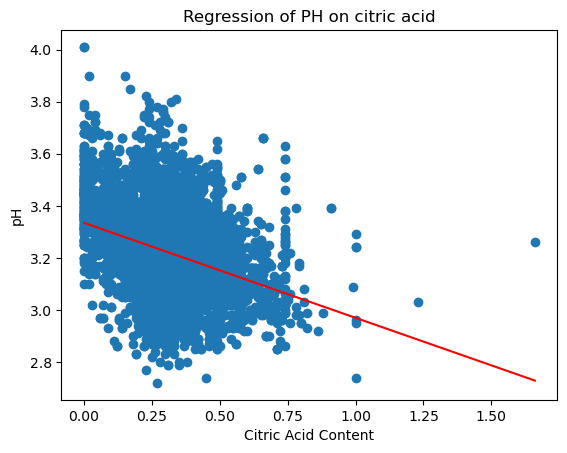

In [36]:
from sklearn.linear_model import LinearRegression

plt.scatter(result['citric_acid'], result['pH'])
plt.xlabel('Citric Acid Content')
plt.ylabel('pH')
plt.title('Regression of PH on citric acid')

X = result[['citric_acid']]
y = result[['pH']]
          
model = LinearRegression()
model.fit(X,y)

slope = model.coef_
intercept = model.intercept_

x = np.linspace(result['citric_acid'].min(), result['citric_acid'].max())
y = slope*x + intercept
y = y.ravel()  # or use y.flatten()
plt.plot(x, y, '-r')
plt.show()

# 13. Find how many variables are independent.

In [37]:
num_ind = result.shape[1] - 1
print("Number of independent variables: ", num_ind)

Number of independent variables:  12


In [38]:
corr_matrix = result.corr()

# Print the correlation matrix
print(corr_matrix)

# Identify dependent variables
dependent_vars = []
threshold = 0.8
for column in corr_matrix:
    for index in corr_matrix.index:
        if column != index and abs(corr_matrix[column][index]) > threshold:
            dependent_vars.append((column, index))

# Print the dependent variables
print(dependent_vars)

# Identify independent variables
all_vars = result.columns.tolist()
independent_vars = [var for var in all_vars if var not in dependent_vars]

                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000          0.219008     0.324436   
volatile_acidity           0.219008          1.000000    -0.377981   
citric_acid                0.324436         -0.377981     1.000000   
residual_sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free_sulfur_dioxide       -0.282735         -0.352557     0.133126   
total_sulfur_dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity    

In [39]:
print(independent_vars)


['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'color']


## 14.Create a new column as the acidity level. Divide the existing data into 5 groups based on the acidity level. The levels are to be named ['High', 'Moderately_High', 'Medium', 'Low']. Acidity may be obtained from the PH.



In [40]:
result['pH'].describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [41]:
bin_edges = [2.72,3.11,3.21,3.32,4.01] 
bin_names = ['High','Moderately_High','Medium','Low'] 
result['acidity_levels'] = pd.cut(result['pH'], bin_edges, labels = bin_names)


In [42]:
levels = result.groupby('acidity_levels')['quality'].mean()
mean_qual_low =levels[3]
mean_qual_medium = levels[2]
mean_qual_high = levels[1]
mean_qual_veryhigh = levels[0]

<BarContainer object of 4 artists>

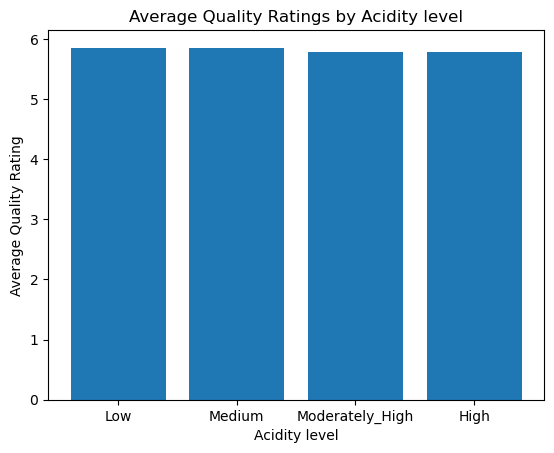

In [43]:
rangeis = [1, 2, 3, 4]
heights = [mean_qual_low, mean_qual_medium, mean_qual_high, mean_qual_veryhigh]
labels = ['Low','Medium','Moderately_High','High']

plt.title('Average Quality Ratings by Acidity level')
plt.xlabel('Acidity level')
plt.ylabel('Average Quality Rating')
plt.bar(rangeis, heights, tick_label=labels)


In [44]:
result.head(-1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white,High
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white,Medium
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white,Medium
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white,Moderately_High
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white,Moderately_High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,red,Low
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red,Low
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red,Low
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red,Low


In [45]:
result['acidity_levels'].value_counts()

High               1717
Moderately_High    1643
Low                1574
Medium             1562
Name: acidity_levels, dtype: int64

# 15.Find the mean quality of each acidity level with groupby. Use groupby

In [46]:
result.groupby('acidity_levels')['quality'].mean()
#result.groupby('quality').mean()

acidity_levels
High               5.783343
Moderately_High    5.784540
Medium             5.850832
Low                5.859593
Name: quality, dtype: float64

# 16.Is a certain type of wine (red or white) associated with higher quality?

In [47]:
result.groupby('color').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
color,,,,,,,,,,,,
red,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
white,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909


<AxesSubplot: title={'center': 'Avg Quality by Color'}, xlabel='color', ylabel='Quality'>

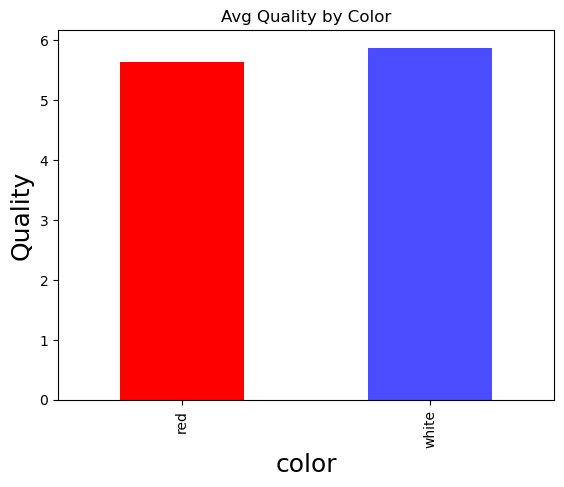

In [48]:
color_means = result.groupby('color')['quality'].mean()

colors=['red', 'white'] 
color_means.plot(kind='bar', title='Avg Quality by Color', color = colors) #from the pd-plot

plt.xlabel('Colors', fontsize=18) #from the plt-plot
plt.ylabel('Quality', fontsize=18)

result.groupby('color')['quality'].mean().plot(kind='bar', title='Avg Quality by Color', color = ['red', 'blue'] , alpha=0.7)


# 17.Select samples with alcohol content less than the median


In [49]:
less_than_median = result['alcohol'] < 10.3
less_than_median.value_counts()

# True determines the number of samples with alcohol content less than the median

False    3320
True     3177
Name: alcohol, dtype: int64

# 18.Get the quality rating for the low alcohol and high alcohol groups.

In [50]:
low_alcohol['quality'].mean()

5.475920679886686

In [51]:
high_alcohol['quality'].mean()

6.146084337349397

Text(0, 0.5, 'Average Quality Rating')

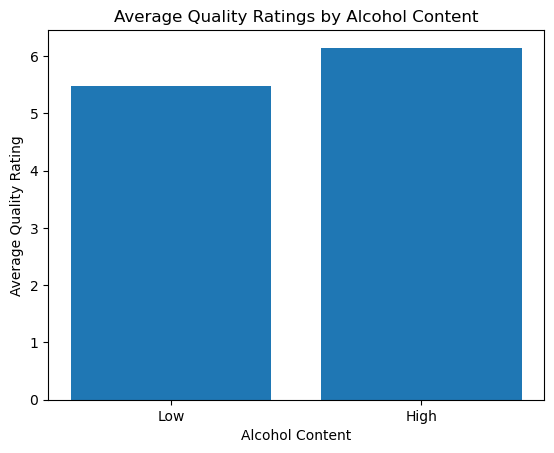

In [52]:
a_median = result['alcohol'].median()

a_low = result.query('alcohol < {}'.format(a_median))
a_high = result.query('alcohol >= {}'.format(a_median))

mean_qual_low = a_low['quality'].mean()
mean_qual_high = a_high['quality'].mean()

rangeis = [1, 2]
heights = [mean_qual_low, mean_qual_high]
labels = ['Low', 'High']
plt.bar(rangeis, heights, tick_label=labels)

plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating')

In [53]:
result['alcohol_group'] = pd.cut(result['alcohol'], bins=[8, result['alcohol'].mean(), 14], labels=['low', 'high'])

# Group the data by alcohol_group and calculate the mean quality
quality_by_alcohol_group = result.groupby('alcohol_group')['quality'].mean()

# Print the mean quality for each alcohol group
print(quality_by_alcohol_group)

alcohol_group
low     5.503583
high    6.184815
Name: quality, dtype: float64


In [54]:
result.head(-1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels,alcohol_group
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white,High,low
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white,Medium,low
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white,Medium,low
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white,Moderately_High,low
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white,Moderately_High,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,red,Low,low
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red,Low,high
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red,Low,high
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red,Low,high


# 19.Do sweeter wines get more ratings?

In [55]:
s_median = result['residual_sugar'].median()
s_low = result.query('residual_sugar < {}'.format(s_median))
s_high = result.query('residual_sugar >= {}'.format(s_median))

mean_qual_low = s_low['quality'].mean()
mean_qual_high = s_high['quality'].mean()

In [56]:
print('Quality Low : ', mean_qual_low)
print('Quality High : ', mean_qual_high)

Quality Low :  5.808800743724822
Quality High :  5.82782874617737


Text(0, 0.5, 'Average Quality Rating')

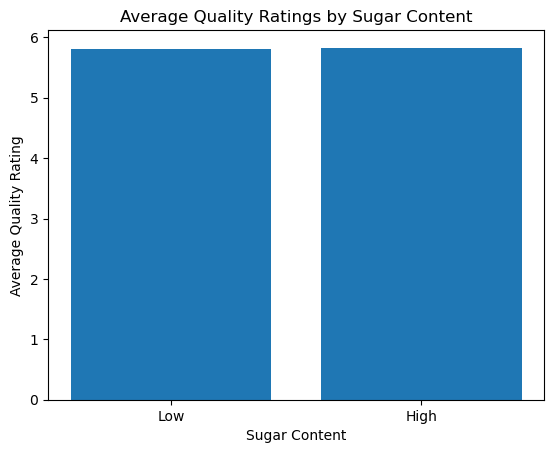

In [57]:
rangeis = [1, 2]
heights = [mean_qual_low, mean_qual_high]
labels = ['Low', 'High']
plt.bar(rangeis, heights, tick_label=labels)

plt.title('Average Quality Ratings by Sugar Content')
plt.xlabel('Sugar Content')
plt.ylabel('Average Quality Rating')

# 20.Get the number of counts based on ratings and color of wine.

In [58]:
counts = result.groupby(['color', 'quality']).size()
counts

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
dtype: int64

# 21.Is the density of red wine and white wine similar?

In [59]:
red_density = result[result['color'] == 'red']['density']
white_density = result[result['color'] == 'white']['density']

# Perform a t-test to compare the means of the two groups
t, p = stats.ttest_ind(red_density, white_density)

# Print the t-statistic and p-value
print("t-statistic: ", t)
print("p-value: ", p)


t-statistic:  34.200222895156706
p-value:  7.319604639974869e-236


In [60]:
if p < 0.05:
    print('Accepted null hypothesis. There is a significant difference between the density of red and white wine')
else:
    print('Rejected null hypothesis. There is not significant difference between the density of red and white wine')

Accepted null hypothesis. There is a significant difference between the density of red and white wine


# 22.Is the confidence interval for the differences of the proportion of white wine with rating 3 and the proportion of red wine with rating 3.

In [61]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [62]:
white_count = result[(result['color'] == 'white') & (result['quality'] == 3)].shape[0]
white_total = result[result['color'] == 'white'].shape[0]

# Get the number of red wine with rating 3 and the total number of red wine
red_count = result[(result['color'] == 'red') & (result['quality'] == 3)].shape[0]
red_total = result[result['color'] == 'red'].shape[0]


In [63]:
count = np.array([white_count, red_count])
nobs = np.array([white_total, red_total])
stat, pval = proportions_ztest(count, nobs)
conf_int = proportion_confint(count, nobs, alpha=0.05, method='normal')


In [64]:
# Print the p-value, z-statistic and the confidence interval
print("p-value: ", pval)
print("z-statistic: ", stat)
print("Confidence interval: ", conf_int)

p-value:  0.2662979112922068
z-statistic:  -1.111628504974206
Confidence interval:  (array([0.0022974 , 0.00238991]), array([0.00586919, 0.01011791]))


In [65]:
if pval < 0.05:
    print('Accepted null hypothesis. There is a confidence interval for the differences of the proportion of red and white wine')
else:
    print('Rejected null hypothesis. There is no confidence interval for the differences of the proportion of red and white wine')

Rejected null hypothesis. There is no confidence interval for the differences of the proportion of red and white wine
